# Object Detection in Images using OpenCV DNN

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## load the COCO class names

In [2]:
# load the COCO class names
with open('../../input/object_detection_classes_coco.txt', 'r') as f:
    class_names = f.read().split('\n')

# get a different color array for each of the classes
nclasses = len(class_names)

COLORS = np.random.uniform(0, 255, size=(nclasses, 3))
print(COLORS[:5])
class_names[:8]

[[224.18535248 242.15147885 183.03559182]
 [178.76237951 137.69668568 228.15947523]
 [ 46.02075143 123.33541424 238.49797573]
 [215.06729273 240.9013199  230.94457021]
 [146.71043935 236.37439943 107.50275388]]


['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck']

# Load the DNN model

In [3]:
model = cv2.dnn.readNet(model='../../input/frozen_inference_graph.pb',
                        config='../../input/ssd_mobilenet_v2_coco_2018_03_29.pbtxt.txt', 
                        framework='TensorFlow')

## Read the image from disk

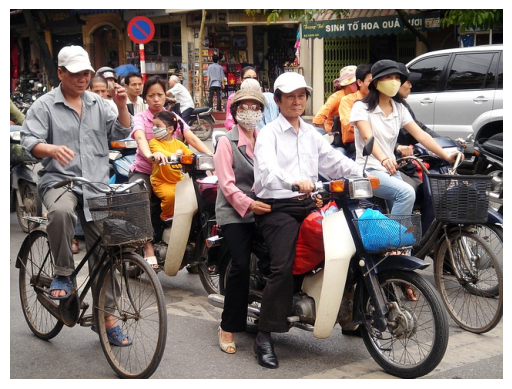

In [4]:
image = cv2.imread('../../input/image_2.jpg')
image_height, image_width, _ = image.shape

# create blob from image
blob = cv2.dnn.blobFromImage(image=image, size=(300, 300), mean=(104, 117, 123), 
                             swapRB=True)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Forward pass through the model

In [5]:
# create blob from image
model.setInput(blob)
# forward pass through the model to carry out the detection
output = model.forward()
print(f'shape of the output: {output.shape}')

shape of the output: (1, 1, 100, 7)


In [6]:
# slice the output to get the detection boxes, confidences and class ids
detections = output[0, 0, :, :]
print(f'shape of the detections: {detections.shape}')

shape of the detections: (100, 7)


In [7]:
# Show the structure of the detections
print(["???", "class_id", "confidence", "x", "y", "w", "h"])

# print the detections truncated to 3 decimals
for detection in detections[:5]:
    print([round(float(i), 3) for i in detection])

['???', 'class_id', 'confidence', 'x', 'y', 'w', 'h']
[0.0, 1.0, 0.95, 0.026, 0.115, 0.252, 0.666]
[0.0, 2.0, 0.917, 0.009, 0.37, 0.318, 0.982]
[0.0, 1.0, 0.907, 0.472, 0.182, 0.817, 0.927]
[0.0, 1.0, 0.894, 0.245, 0.201, 0.41, 0.732]
[0.0, 4.0, 0.878, 0.412, 0.393, 0.873, 0.991]


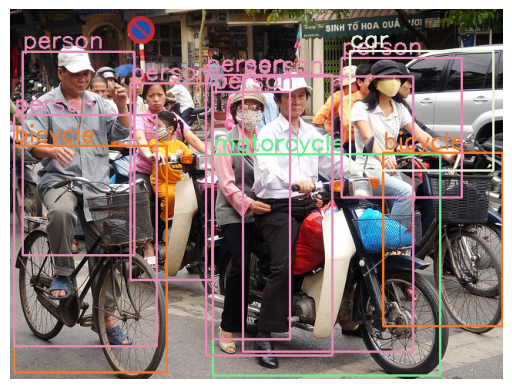

In [8]:
# loop over each of the detection
for detection in detections:
    
    # extract the confidence of the detection
    confidence = detection[2]
    
    # draw bounding boxes only if the detection confidence is above...
    # ... a certain threshold, else skip
    if confidence > .4:
        
        # get the class id
        class_id = detection[1]
        
        # map the class_id id to the class name
        class_name = class_names[int(class_id)-1]
        color = COLORS[int(class_id)]
        
        # get the bounding box coordinates
        box_x = detection[3] * image_width
        box_y = detection[4] * image_height
        
        # get the bounding box width and height
        box_width = detection[5] * image_width
        box_height = detection[6] * image_height
        
        # draw a rectangle around each detected object
        cv2.rectangle(image, (int(box_x), int(box_y)), (int(box_width), int(box_height)), color, thickness=2)
        
        # put the FPS text on top of the frame
        cv2.putText(image, class_name, (int(box_x), int(box_y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [9]:
# List the detections
for detection in detections:
    confidence = detection[2]
    if confidence > .1:
        class_id = detection[1]
        class_name = class_names[int(class_id)-1]
        print(f'{class_name}: {confidence*100:.2f}%')

person: 95.01%
bicycle: 91.75%
person: 90.70%
person: 89.43%
motorcycle: 87.81%
bicycle: 72.95%
person: 70.75%
person: 66.11%
car: 56.98%
person: 44.33%
person: 43.30%
person: 37.48%
bicycle: 34.25%
person: 28.39%
person: 27.16%
person: 26.89%
person: 25.29%
car: 24.61%
person: 22.43%
person: 20.65%
motorcycle: 20.48%
person: 19.72%
person: 19.01%
person: 18.87%
person: 18.43%
car: 17.76%
car: 17.48%
bicycle: 16.10%
person: 15.92%
person: 15.35%
motorcycle: 15.14%
person: 15.12%
person: 14.54%
person: 14.21%
person: 14.21%
person: 14.05%
person: 13.44%
car: 13.34%
motorcycle: 13.33%
person: 12.70%
person: 12.49%
person: 12.28%
person: 12.01%
bicycle: 11.52%
bicycle: 11.15%
motorcycle: 10.88%
